# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the first few rows of each DataFrame to understand the structure
print("Mouse Metadata:")
print(mouse_metadata.head())

print("\nStudy Results:")
print(study_results.head())

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print("\nMerged DataFrame:")
print(merged_df.head())


Mouse Metadata:
  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

Study Results:
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

Merged DataFrame:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21        

In [3]:
# Checking the number of mice.
unique_mice_count = merged_df['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice_count}")

Number of unique mice IDs: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoints = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
if not duplicate_timepoints.empty:
    print("\nMouse IDs with duplicate time points:")
    print(duplicate_timepoints)


Mouse IDs with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801             

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_dataframe=clean_dataframe.astype({'Tumor Volume (mm3)':'float'})
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
new_count=clean_dataframe['Mouse ID'].nunique()
new_count

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).mean()
mean.astype(float)
median=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).median()
median.astype(float)
variance=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).var()
variance.astype(float)
stdev=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).std()
stdev.astype(float)
sem=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).sem()
sem.astype(float)
# Assemble the resulting series into a single summary DataFrame.

combined_statistics=pd.DataFrame({'Mean Tumor Volume':mean,
                                'Median Tumor Volume':median,
                                 'Tumor Volume Variance':variance,
                                 'Tumor Volume Std. Dev.':stdev,
                                 'Tumor Volume Std. Err':sem})
combined_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_dataframe.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drugs=clean_dataframe.groupby(["Drug Regimen"])
drug_number= pd.DataFrame(mice_drugs['Drug Regimen'].count())
drug_graph=drug_number.plot(kind='bar',color="purple",figsize=(10,5))
plt.title('Number of Mice Per Treatment',fontsize=20)
plt.xlabel("Drug Regimen",fontsize=15)
plt.ylabel("Number of Mice Treated",fontsize=15)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Plot the bar chart using Pandas plot function



In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(drug_number))
tick_loc=[value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis,drug_number['Drug Regimen'],color='b',alpha=1,align='center',width=0.5)
plt.xticks(tick_loc,list(drug_number.index),rotation='vertical')
plt.xlim(-0.7,len(x_axis)-0.7)
plt.ylim(0,max(drug_number['Drug Regimen'])+10)
plt.title("Total Number of Measurements On Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('# Of Observed Mouse Timepoints')
drug_reg = ['Drug Regimen']
plt.legend(drug_reg,loc="best")
plt.tight_layout()
plt.show()

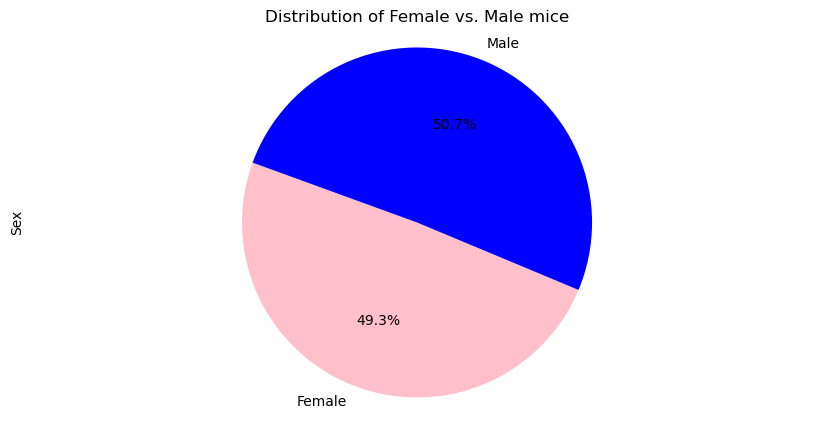

In [9]:
gender_plot=clean_dataframe.groupby('Sex')
gender_count=pd.DataFrame(gender_plot['Sex'].count())

gender_count.plot(kind='pie',figsize=(10,5),y='Sex',title='Distribution of Female vs. Male mice'
,startangle=160,autopct='%1.1f%%',shadow=False, colors=['pink','blue'],legend=False)
plt.axis('equal')
plt.show()

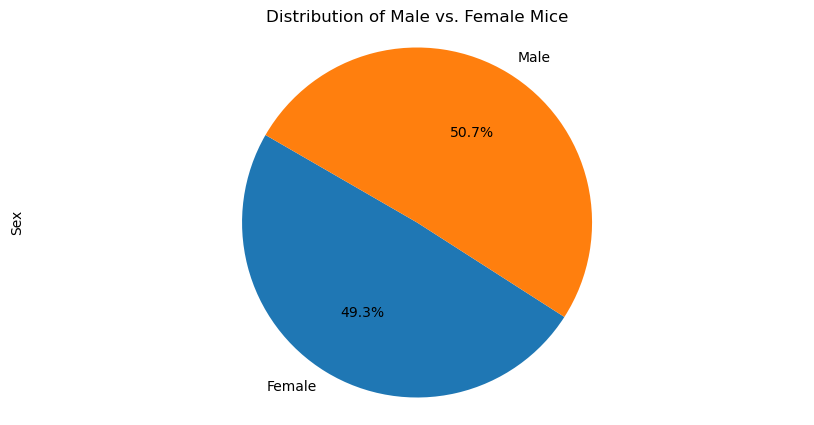

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot_py=list(gender_count.index.values)
gender_values=gender_count['Sex']
#Oddly colors are not taking
colors=['cyan','fuchsia']

plt.figure(figsize=(10,5))
plt.pie(gender_values,labels=gender_plot_py,startangle=150,autopct='%1.1f%%', shadow=False)

plt.title("Distribution of Male vs. Female Mice")
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Get the last (greatest) timepoint for each mouse
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin=clean_dataframe.loc[clean_dataframe['Drug Regimen']=='Capomulin',:]
Ramicane=clean_dataframe.loc[clean_dataframe['Drug Regimen']=='Ramicane',:]
Infubinol=clean_dataframe.loc[clean_dataframe['Drug Regimen']=='Infubinol',:]
Ceftamin=clean_dataframe.loc[clean_dataframe['Drug Regimen']=='Ceftamin',:]



Capomulin_final=Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol=pd.DataFrame(Capomulin_final)



Capomulin_combined=pd.merge(Capomulin_final,clean_dataframe,on=('Mouse ID','Timepoint'),how='left')
Capomulin_combined.head()
#Ramicane_combined=pd.merge(Ramicane_last,clean_dataframe,on=('Mouse ID','Timepoint'),how='left')
#Ramicane_combined.head()
 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Display information for each treatment
    

# Plot the tumor volume data for each treatment
 

Capomulin_tumors=Capomulin_combined['Tumor Volume (mm3)']

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lower=quartiles[0.25]
upper=quartiles[0.75]
interquartile=upper-lower
lowerbound=round(lower-(1.5*interquartile),2)
upperbound=round(upper+(1.5*interquartile),2)

print(f'The upper quartile of Capomulin tumors is: {upper}')
print(f'The lower quartile of Capomulin tumors is: {lower}')
print(f'The interquartile of Capomulin tumors is:{interquartile}')
print(f'The values above {upper} could be outliers')
print(f'The values below {lower} could be outliers')



The upper quartile of Capomulin tumors is: 40.1592203
The lower quartile of Capomulin tumors is: 32.37735684
The interquartile of Capomulin tumors is:7.781863460000004
The values above 40.1592203 could be outliers
The values below 32.37735684 could be outliers


In [26]:
#Ramicane
Ramicane_final=Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol=pd.DataFrame(Ramicane_final)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Ramicane_combined=pd.merge(Ramicane_final,clean_dataframe,on=('Mouse ID','Timepoint'),how='left')
Ramicane_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [27]:
Ramicane_tumors=Ramicane_combined['Tumor Volume (mm3)']
quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lower=quartiles[0.25]
upper=quartiles[0.75]
interquartile=upper-lower
lowerbound=round(lower-(1.5*interquartile),2)
upperbound=round(upper+(1.5*interquartile),2)

print(f'The upper quartile of Ramicane tumors is: {upper}')
print(f'The lower quartile of Ramicane tumors is: {lower}')
print(f'The interquartile of Ramicane tumors is:{interquartile}')
print(f'The values above {upper} could be outliers')
print(f'The values below {lower} could be outliers')

The upper quartile of Ramicane tumors is: 40.65900627
The lower quartile of Ramicane tumors is: 31.56046955
The interquartile of Ramicane tumors is:9.098536719999998
The values above 40.65900627 could be outliers
The values below 31.56046955 could be outliers


In [28]:
#Infubinol

Infubinol_final=Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol=pd.DataFrame(Infubinol_final)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Infubinol_combined=pd.merge(Infubinol_final,clean_dataframe,on=('Mouse ID','Timepoint'),how='left')
Infubinol_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [29]:
Infubinol_tumors=Infubinol_combined['Tumor Volume (mm3)']

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lower=quartiles[0.25]
upper=quartiles[0.75]
interquartile=upper-lower
lowerbound=round(lower-(1.5*interquartile),2)
upperbound=round(upper+(1.5*interquartile),2)

print(f'The upper quartile of Infubinol tumors is: {upper}')
print(f'The lower quartile of Infubinol tumors is: {lower}')
print(f'The interquartile of Infubinol tumors is:{interquartile}')
print(f'The values above {upper} could be outliers')
print(f'The values below {lower} could be outliers')

The upper quartile of Infubinol tumors is: 65.52574285
The lower quartile of Infubinol tumors is: 54.04860769
The interquartile of Infubinol tumors is:11.477135160000003
The values above 65.52574285 could be outliers
The values below 54.04860769 could be outliers


In [30]:
#Ceftamin

Ceftamin_final=Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol=pd.DataFrame(Ceftamin_final)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Ceftamin_combined=pd.merge(Ceftamin_final,clean_dataframe,on=('Mouse ID','Timepoint'),how='left')
Ceftamin_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [31]:
Ceftamin_tumors=Ceftamin_combined['Tumor Volume (mm3)']

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lower=quartiles[0.25]
upper=quartiles[0.75]
interquartile=upper-lower
lowerbound=round(lower-(1.5*interquartile),2)
upperbound=round(upper+(1.5*interquartile),2)

print(f'The upper quartile of Ceftamin tumors is: {upper}')
print(f'The lower quartile of Ceftamin tumors is: {lower}')
print(f'The interquartile of Ceftamin tumors is:{interquartile}')
print(f'The values above {upper} could be outliers')
print(f'The values below {lower} could be outliers')

The upper quartile of Ceftamin tumors is: 64.29983003
The lower quartile of Ceftamin tumors is: 48.72207785
The interquartile of Ceftamin tumors is:15.577752179999997
The values above 64.29983003 could be outliers
The values below 48.72207785 could be outliers


In [32]:
# Put treatments into a list for for loop (and later for plot labels


drugnames = ['Capomulin','Ramicane','Ceftamin','Infubinol']

drugs = clean_dataframe[clean_dataframe['Drug Regimen'].isin(drugnames)]
drugs.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [34]:
 #Figuring out time point for each drug
final_timepoint = drugs.groupby(['Drug Regimen',"Mouse ID"]).aggregate(tumor_size=("Tumor Volume (mm3)",lambda x:x.iloc[-1]))

#Formatting
final_timepoint = final_timepoint.stack(level=0).unstack(level=0)
for drug in drugnames:
    print(drug)

Capomulin
Ramicane
Ceftamin
Infubinol


In [36]:
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes

#Setting up loop in Pandas
for drug in drugnames:

    quartiles = final_timepoint[drug].quantile([.25,.5,.75]).round(2)  
    upper = quartiles[.75].round(2)
    lower = quartiles[.25].round(2)
    interquartile=round(upper-lower,2)
    upperoutlier = round(upper+(1.5*interquartile),2)
    loweroutlier = round(lower-(1.5*interquartile),2)      
    
    print(f'The upper quartile of {drug} treatments is: {upper}')
    print(f'The lower quartile of {drug} treatments is: {lower}')
    print(f'The interquartile range of {drug} treatments is: {interquartile}')
    print(f'Values above {upperoutlier} could be {drug} outliers')
    print(f'Values below {loweroutlier} could be {drug} outliers')
    print(f"")

The upper quartile of Capomulin treatments is: 40.16
The lower quartile of Capomulin treatments is: 32.38
The interquartile range of Capomulin treatments is: 7.78
Values above 51.83 could be Capomulin outliers
Values below 20.71 could be Capomulin outliers

The upper quartile of Ramicane treatments is: 40.66
The lower quartile of Ramicane treatments is: 31.56
The interquartile range of Ramicane treatments is: 9.1
Values above 54.31 could be Ramicane outliers
Values below 17.91 could be Ramicane outliers

The upper quartile of Ceftamin treatments is: 64.3
The lower quartile of Ceftamin treatments is: 48.72
The interquartile range of Ceftamin treatments is: 15.58
Values above 87.67 could be Ceftamin outliers
Values below 25.35 could be Ceftamin outliers

The upper quartile of Infubinol treatments is: 65.53
The lower quartile of Infubinol treatments is: 54.05
The interquartile range of Infubinol treatments is: 11.48
Values above 82.75 could be Infubinol outliers
Values below 36.83 could b

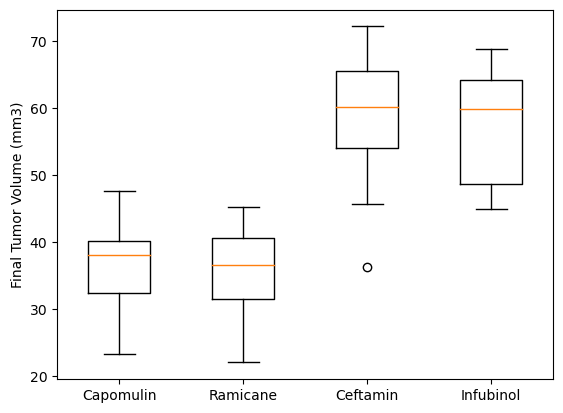

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot=[Capomulin_tumors,Ramicane_tumors,Infubinol_tumors,Ceftamin_tumors]

fig1,axl=plt.subplots()
axl.set_ylabel('Final Tumor Volume (mm3)')
axl.boxplot(boxplot,labels=drugnames ,widths = 0.5, vert = True)

plt.show()

## Line and Scatter Plots

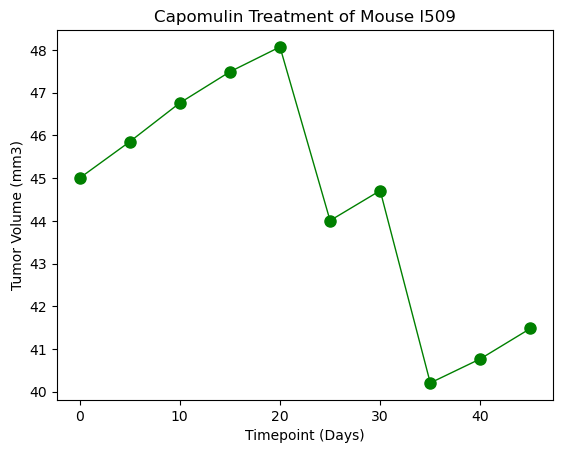

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

lineplot = Capomulin.loc[Capomulin['Mouse ID']== 'l509',:]
lineplot.head()

xaxis = lineplot['Timepoint']
tumsiz = lineplot['Tumor Volume (mm3)']

fig1, axl = plt.subplots()
plt.title('Capomulin Treatment of Mouse l509')
plt.plot(xaxis, tumsiz,linewidth=1,markersize=8,marker="o",color="green",label='Fahrenheit')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

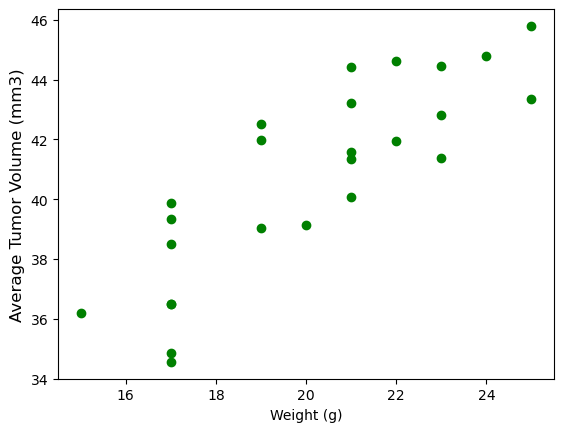

In [41]:
 # Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#fig1,ax1=plt.subplots(figsize=(15,10))
Avg_Capo_VolY=Capomulin.groupby('Mouse ID').mean(numeric_only=True)['Tumor Volume (mm3)']
Avg_Capo_VolX=Capomulin.groupby('Mouse ID').mean(numeric_only=True)['Weight (g)']
#Avg_Capo_Vol.mean(numeric_only=True)
#Avg_Capo_Vol.head(10)
#Capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()

Avg_Capo_VolX.head()
Avg_Capo_VolY.head()


plt.scatter(Avg_Capo_VolX,Avg_Capo_VolY,color='green')
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)',fontsize=12)

#plt.show()

## Correlation and Regression

In [43]:
 # Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

cor_cof=st.pearsonr(Avg_Capo_VolX,Avg_Capo_VolY)
print(f"The correlation between mouse weight and the average tumor volume is: {round(cor_cof[0],2)}")

model=st.linregress(Avg_Capo_VolX,Avg_Capo_VolY)
model

The correlation between mouse weight and the average tumor volume is: 0.84


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

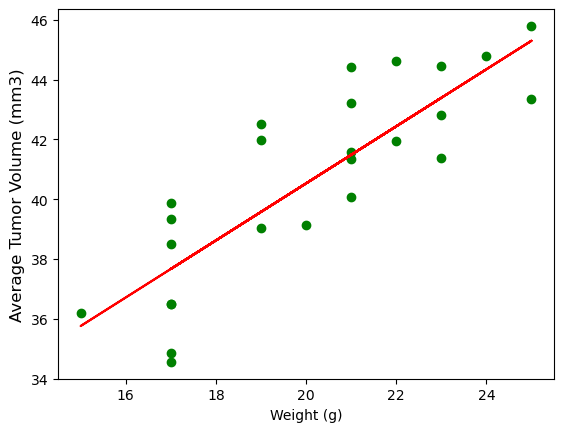

In [44]:
 mslope=0.954439
bintercept=21.4421
yvalues=Avg_Capo_VolX*mslope+bintercept
plt.scatter(Avg_Capo_VolX,Avg_Capo_VolY,color='green')
plt.plot(Avg_Capo_VolX,yvalues,color='red')
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)',fontsize=12)
 
 